In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# Gerekli paketleri indirelim
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input director

In [2]:
#DATAMIZI İNCELEMELİYİZ(we need to review our data)
# Burada iceceklerin iceriklerine gore kaliteli olup olmadigini siniflandiracagiz

In [3]:
data=pd.read_csv('winequality-red.csv')
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [5]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#SINIFLANDIRMA MODELLERİMİZE GEÇEBİLİRİZ(WE CAN GO TO OUR CLASSIFICATION MODELS)

In [7]:
#KNN CLASİFİCATİON

In [8]:
data.quality=[1 if each > 6 else 0 for each in data.quality]
y=data.quality
x=data.drop(['quality'],axis=1)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
#VERİMİZİ NORMALİZE EDİYORUZ(NORMALİZE OF DATA)

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print('{} nn değeri için {} '.format(3,knn.score(x_test,y_test)))

3 nn değeri için 0.865625 


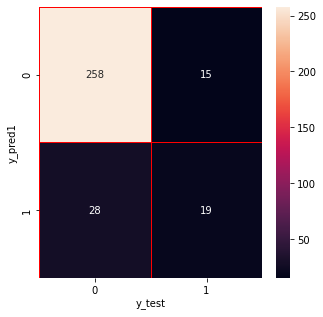

In [13]:
y_pred1=knn.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred1)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_test")
plt.ylabel("y_pred1")
plt.show()

In [14]:
#SUPER VECTOR CLASİFİCATİON

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.svm import SVC
svm=SVC(random_state=42)
svm.fit(x_train,y_train)
print('svm score :',svm.score(x_test,y_test))

svm score : 0.85625


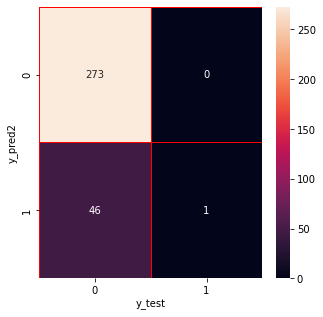

In [17]:
y_pred2=svm.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred2)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_test")
plt.ylabel("y_pred2")
plt.show()

In [18]:
#NAİVE BAYES CLASİFİCATİON

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
print('nb score :',nb.score(x_test,y_test))

nb score : 0.853125


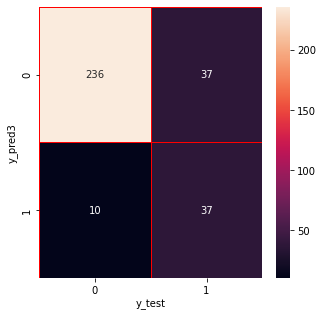

In [21]:
y_pred3=nb.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred3)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_test")
plt.ylabel("y_pred3")
plt.show()

In [22]:
#DECİSİON TREE CLASİFİCATİON

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print('dt score',dt.score(x_test,y_test))

dt score 0.8875


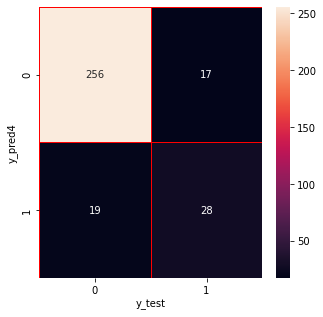

In [25]:
y_pred4=dt.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred4)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_test")
plt.ylabel("y_pred4")
plt.show()

In [26]:
#RANDOM FOREST CLASİFİCATİON

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
print('rf score :',rf.score(x_test,y_test))

rf score : 0.9


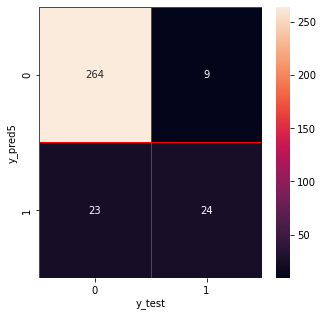

In [29]:
y_pred5=rf.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred5)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_test")
plt.ylabel("y_pred5")
plt.show()

In [30]:
#TÜM CLASİFİCATİON METODLARIMIZIN SONUÇLARINI BİR PLOTTA GÖSTERELİM
#(SHOWING THE RESULTS OF OUR CLASIFICATİON METHODS ON A PLOT)

In [31]:
dicti={'knn_score':knn.score(x_test,y_test),'svm_score':svm.score(x_test,y_test),
           'nb_score':nb.score(x_test,y_test),'dt_score': dt.score(x_test,y_test),
          'rf_score':rf.score(x_test,y_test)}

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [32]:
for key,value in dicti.items():
    print(key," : ",value)
    
print('')

knn_score  :  0.853125
svm_score  :  0.85625
nb_score  :  0.853125
dt_score  :  0.8875
rf_score  :  0.9



In [33]:

key_lis=list(('knn_score','svm_score','nb_score','dt_score','rf_score'))
value_lis=list((0.85,0.85,0.853125,0.865625,0.9))

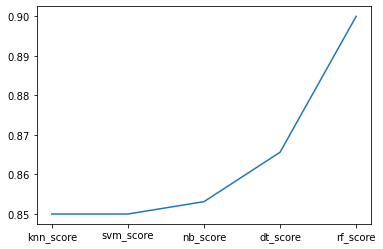

In [34]:
plt.plot(key_lis,value_lis)
plt.show()

In [35]:
#CONCLUSİON

#Bu verimiz için en uygun methodumuz RANDOM FOREST 
#çünkü en doğru tahmin yukarıda görüldüğü gibi RF methodunda elde edildi.
#(Our best method for this data is RANDOM FOREST
# Because the most accurate estimate was obtained in the RF method as seen above)